In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widget
from IPython.display import display
%matplotlib inline

pi = np.math.pi

    
plt.rcParams['font.size'] = 40
plt.rcParams['figure.figsize'] = (40, 10)
plt.rcParams['lines.linewidth'] = 2.0

def setLabels(lX, lY):
    plt.xlabel(lX)
    plt.ylabel(lY)

# Aufgabe 7: Zeitdiskrete Systeme

Gegeben ist ein zeitdiskretes System mit der Impulsantwort $h(n) = \gamma(n) + \gamma(n-1)$. $\gamma(n)$ bezeichne hierbei den zeitdiskreten Einheitsimpuls.

#### Graph der Impulsantwort $h(n)$

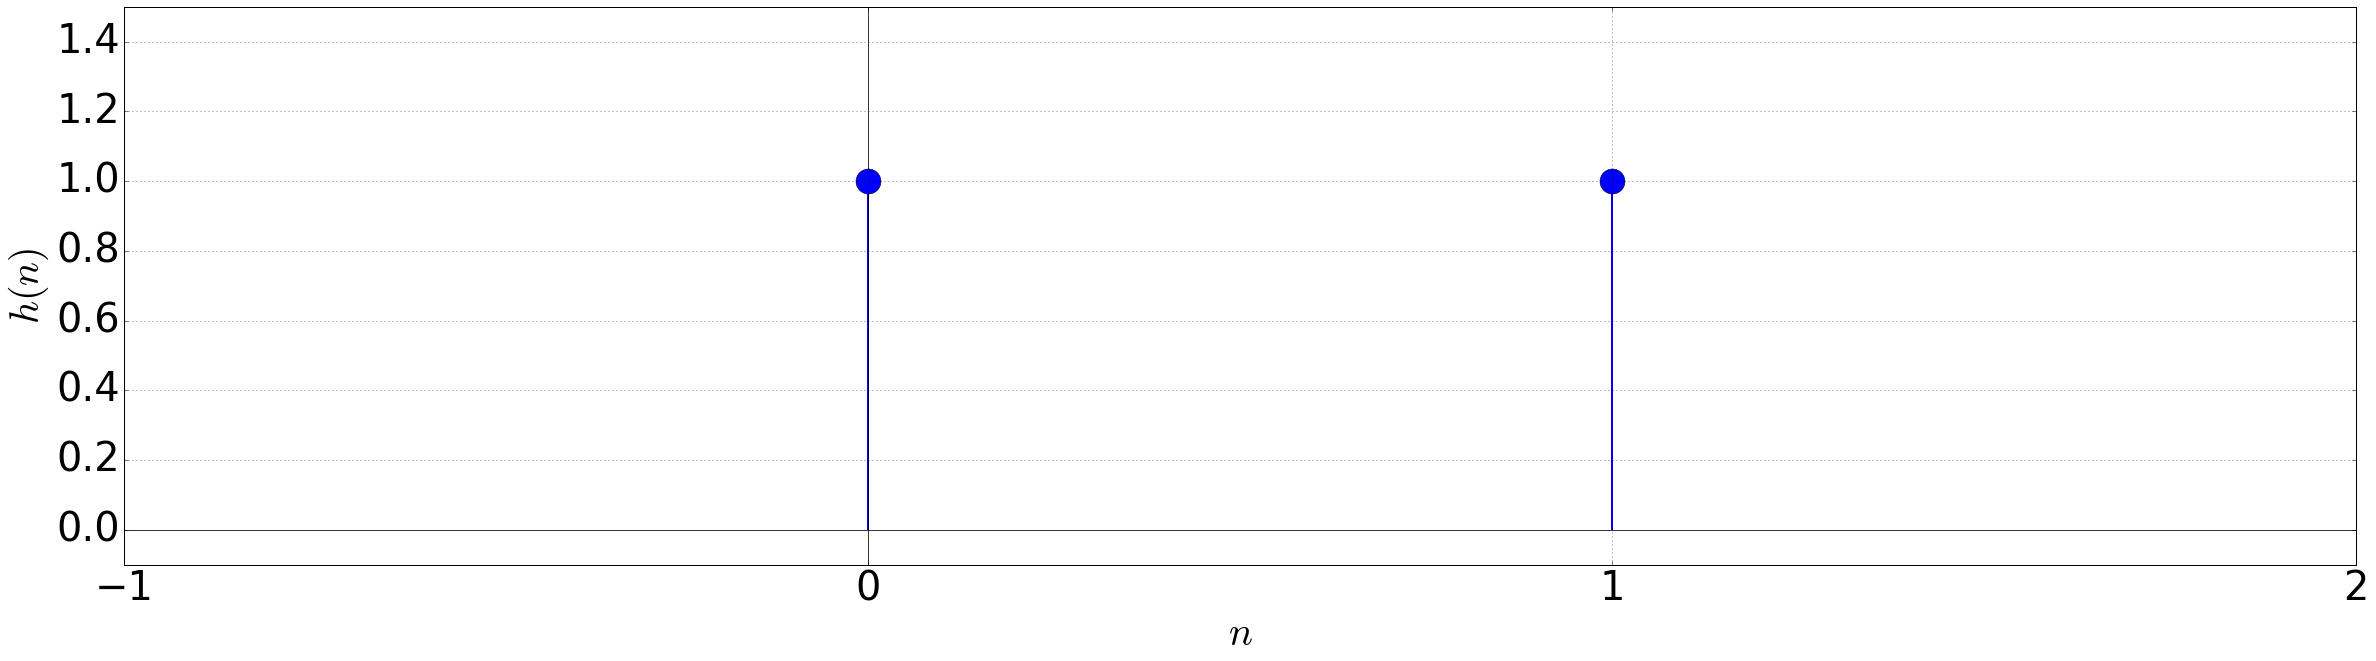

In [3]:
plt.grid()
plt.xlim((-1, 2))
plt.ylim((-0.1, 1.5))
plt.axvline(linewidth=0.75, color='k')
plt.plot([0, 1], [1, 1], 'bo', markersize=25)
plt.xticks(np.arange(-1, 3))
plt.vlines([0, 1], 0, [1, 1], 'b')
plt.axhline(linewidth=0.75, color='k')
setLabels(r'$n$', r'$h(n)$')

## 7.1
Berechnen sie die Übertragungsfunktion des Systems.

\begin{align}
    H \left(\mathrm{e}^{j\omega T}\right) &= \mathcal{F}_\text{d} \left\{ h(n) \right\} = \mathcal{F}_\text{d} \left\{ \gamma(n) + \gamma(n-1) \right\} \\
    &= \sum_{n=-\infty}^{\infty} \left( \gamma(n) + \gamma(n-1) \right) \mathrm{e}^{-j\omega n T}  \\
    &= \sum_{n=-\infty}^{\infty} \gamma(n)\mathrm{e}^{-j\omega n T} + \sum_{n=-\infty}^{\infty} \gamma(n-1)\mathrm{e}^{-j\omega n T} \\
    &= 1 + \mathrm{e}^{-j\omega T}
\end{align}

Auch die Übertragungsfunktion ist wieder (bis auf den Faktor $1/2$ die gleicghe wie in Aufgabe 3:  
Die Übertragungsfunktion ist periodisch in $\omega$. Sie hat den Wert 1 für $\omega = 2k \frac{\pi}{T}$ und den Wert 0 für $\omega = (2k+1)\cdot \frac{\pi}{T}$ mit $k \in \mathbb{Z}$.  
Durch die durch das Abtasttheorem vorgegebene Beschränkung auf den Frequenzbereich $\omega \in \left[ -\frac{\pi}{T}, \frac{\pi}{T} \right]$ stellt das System einen (sehr breitbandigen) Tiefpass dar.

### Einschub: Graph der Übertragungsfunktion
Die Übertragungsfunktion lässt auch auch in der Betrags-Phasen-Darstellung bringen:

\begin{align}
    H \left(\mathrm{e}^{j\omega T}\right) =  \left| H \left(\mathrm{e}^{j\omega T}\right) \right| \mathrm{e}^{j \mathrm{arg} \left\{  H \left(\mathrm{e}^{j\omega T}\right) \right\} }
\end{align}

Betrag und Phase werden im folgenden besprochen.

#### Graph des Betrags der Übertragungsfunktion $\left|H \left(\mathrm{e}^{j\omega T}\right) \right|$

\begin{align}
    \left| H \left(\mathrm{e}^{j\omega T}\right) \right| = \sqrt{H \left(\mathrm{e}^{j\omega T}\right) \cdot H^{\ast} \left(\mathrm{e}^{j\omega T}\right)} &= \sqrt{\left( 1 + \mathrm{e}^{-j\omega T} \right) \cdot \left( 1 + \mathrm{e}^{j\omega T} \right)} \\
    &= \sqrt{1 + \mathrm{e}^{j\omega T} + \mathrm{e}^{-j\omega T} + 1} \\
    &= \left. \sqrt{2\left(1 + \cos\left(\omega T\right)\right)} \qquad \right|
        \cos^2(x) = \frac{1}{2} + \frac{1}{2}\cos(2x) \quad \text{mit } x=\frac{\omega T}{2}\\
    &= \sqrt{4 \cos^2 \left( \frac{\omega T}{2} \right)} = 2\cos \left( \frac{\omega T}{2} \right) 
    := A(\omega)
\end{align}

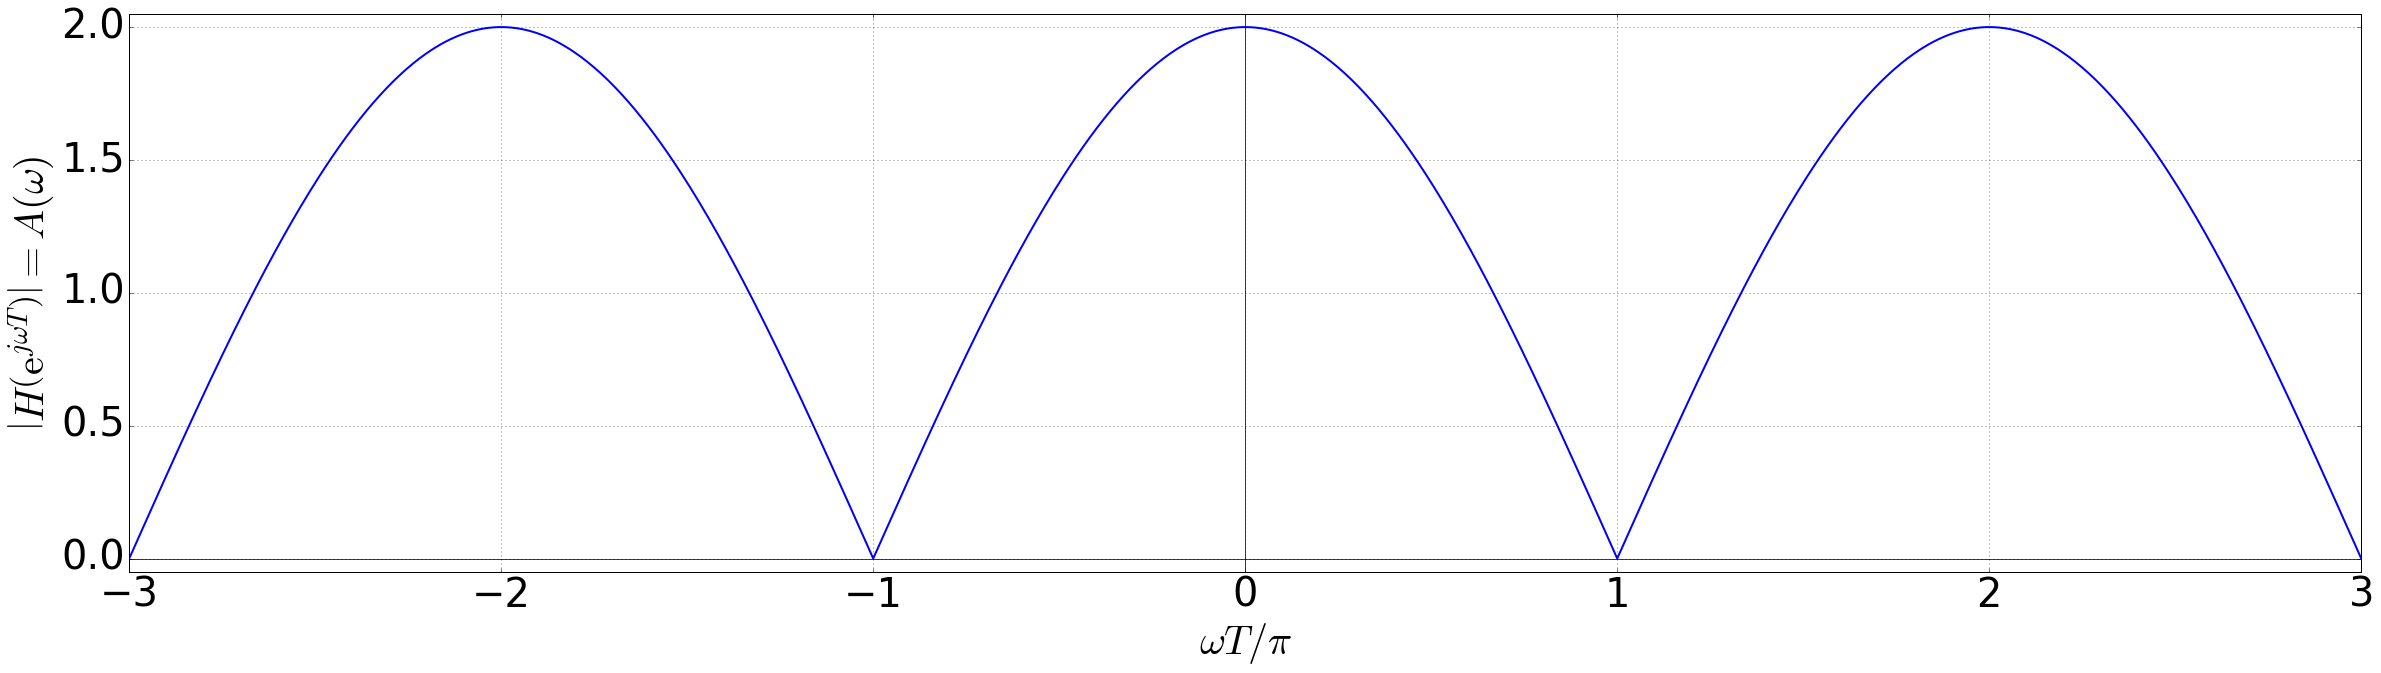

In [4]:
wT = np.linspace(-3*pi, 3*pi, 1000)
H = (1 + np.exp(-1j*wT))

plt.axvline(linewidth=0.75, color='k')
plt.plot(wT/pi, np.abs(H))
plt.axhline(linewidth=0.75, color='k')
plt.ylim((-0.05, 2.05))
plt.grid()
setLabels(r'$\omega T/\pi$', r'$\left|H \left(\mathrm{e}^{j\omega T}\right)\right| = A(\omega)$')

#### Graph der Phase der Übertragungsfunktion $\mathrm{arg} \left\{H \left(\mathrm{e}^{j\omega T}\right) \right\}$

\begin{align}
    \mathrm{arg} \left\{H \left(\mathrm{e}^{j\omega T}\right) \right\} &= \arctan \left( \frac{ \mathrm{Im} \left\{H \left(\mathrm{e}^{j\omega T}\right) \right\} }{ \mathrm{Re} \left\{H \left(\mathrm{e}^{j\omega T}\right) \right\} } \right) \\
    &=\left. \arctan \left( \frac{ - \sin(\omega T) }{1 + \cos(\omega T) } \right) \qquad \qquad\right| \cos^2(x) = \frac{1}{2}\left( 1 + \cos(2x)\right) \text{,} \quad 2\sin(x)\cos(x) = \sin(2x) \quad \text{mit } x=\frac{\omega T}{2}\\
    &= -\arctan \left( \frac{2 \sin\left(\frac{\omega T}{2}\right) \cos\left(\frac{\omega T}{2}\right)}{ 2 \cos^2\left(\frac{\omega T}{2}\right) } \right) \\
    &= -\arctan \left( \frac{ \sin \left( \frac{\omega T}{2} \right) }{ \cos \left( \frac{\omega T}{2} \right) } \right)
    = -\arctan \left( \tan \left( \frac{\omega T}{2} \right) \right) = -\frac{\omega T}{2} := \varphi(\omega)
\end{align}
Der Phasenverlauf ist also eine lineare Funktion der Frequenz. Dies ist von Vorteil, da alle Frequenzen durch das System dieselbe Verzögerung erfahren und ein impulsförmiges Eingangssignal nur geglättet wird, aber zeitlich nicht auseinanderläuft. Linearphasigkeit ist deshalb häufig eine sehr wichtige Eigenschaft eines guten Filterentwurfs.

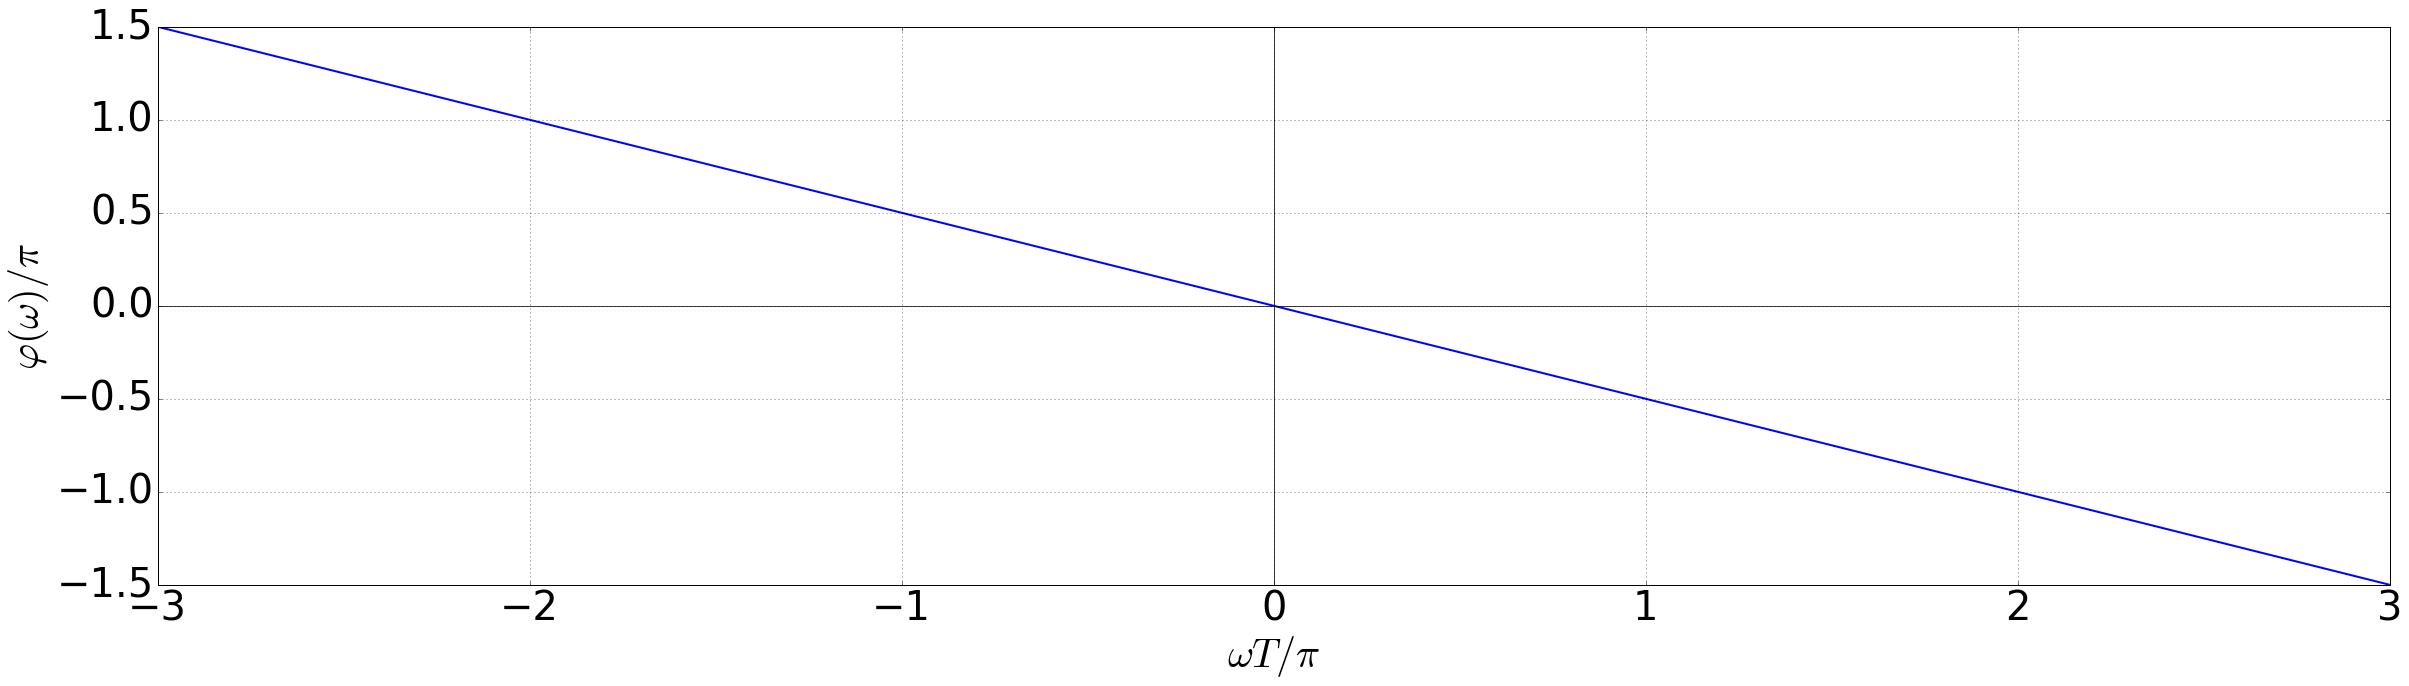

In [5]:
# needed to show plot without phase jumps
def unwrap(phase):
    return np.unwrap(2*phase)/2+pi

plt.axvline(linewidth=0.75, color='k')
plt.plot(wT/pi, unwrap(np.angle(H))/pi)
plt.axhline(linewidth=0.75, color='k')
plt.ylim((-3/2, 3/2))
plt.grid()
setLabels(r'$\omega T/\pi$', r'$\varphi(\omega)/\pi$')

## 7.2:
Das Eingangssignal sei $x(n) =\cos(\omega_0 n T)$. Berechnen sie das Ausgangssignal y(n).

#### Lösung im Zeitbereich:
Wie im Zeitkontinuierlichen gilt:  

\begin{align}
    y(n) &= x(n) \ast h(n)\\
    &= \cos (\omega_0 n T) \ast \left(\gamma(n) + \gamma(n-1) \right) \\
    &= \cos (\omega_0 n T) + \cos (\omega_0 (n-1) T)
\end{align}

## 7.3
Zeigen Sie, dass der Phasenverlauf des Ausgangssignals eine lineare Funktion der Kreisfrequenz $\omega_0$ ist.  
Hinweis: $\cos(\alpha) + \cos(\beta) = 2\cos\left(\frac{\alpha + \beta}{2} \right)\cos\left(\frac{\alpha - \beta}{2} \right)$

Mit dem Hinweis aus der Aufgabenstellung folgt:  

\begin{align}
    y(n) &= \cos (\underbrace{\omega_0 n T}_{\beta}) + \cos (\underbrace{\omega_0 (n-1) T}_{\alpha}) \\
    &= 2\cos\left(\frac{\omega_0 (n-1) T + \omega_0 n T}{2} \right)\cos\left(\frac{\omega_0 (n-1) T - \omega_0 n T}{2} \right) \\
    &= \underbrace{2\cos\left(\frac{\omega_0 T}{2} \right)}_{A(\omega_0)} \cos\bigg(\omega_0 n T \underbrace{- \frac{\omega_0 T}{2}}_{\varphi(\omega_0)} \bigg)
\end{align}  

Es gilt also $\varphi(\omega_0) = - \frac{\omega_0 T}{2}$. Der Phasenverlauf ist deshalb linear. Dies ist bereits im Plot zu Aufgabenteil 7.1 zu sehen.

## 7.4
Ermitteln sie die Autokorrelationsfunktion (AKF) der Impulsantwort.

Die Energie von $h(n)$ ist endlich:  

\begin{align}
    E_h = \sum_{n=-\infty}^{\infty} \left| h(n) \right|^2 = 1 + 1 = 2 < \infty
\end{align}

Die Impulsantwort stellt deshalb ein diskretes Energiesignal dar. Deshalb kann die Definition der AKF für Energiesignale verwendet und die Faltungsdarstellung ausgenutzt werden:  

\begin{align}
    \varphi^E_{hh}(\lambda) &= \sum_{n=-\infty}^{\infty} h^{\ast}(n)\ h(n+\lambda) = h^{\ast}(-\lambda) \ast h(\lambda) \\
    &= \left(\gamma(-\lambda) + \gamma(-\lambda-1) \right) \ast \left(\gamma(\lambda) + \gamma(\lambda-1) \right)
\end{align}

Da der diskrete Gammaimpuls eine gerade Funktion ist, folgt:  

\begin{align}
    \varphi^E_{hh}(\lambda) &= \left(\gamma(\lambda) + \gamma(\lambda+1) \right) \ast \left(\gamma(\lambda) + \gamma(\lambda-1) \right) \\
    &= \gamma(\lambda)\ast\gamma(\lambda) + \gamma(\lambda)\ast\gamma(\lambda-1) + \gamma(\lambda+1)\ast\gamma(\lambda) + \gamma(\lambda+1)\ast\gamma(\lambda-1) \\
    &= \gamma(\lambda+1) + 2\gamma(\lambda) + \gamma(\lambda-1)
\end{align}

Die AKF eines rellen Zeitsignals ist **immer** eine gerade Funktion. Dies ist auch auf dem folgenden Graphen sichtbar.  
Für komplexe Signale ist die AKF hermitesch symmetrisch: $\left(\varphi^E_{hh}(\lambda)\right)^{\ast} = \varphi^E_{hh}(-\lambda)$, der Realteil der AKF ist also **immer** eine gerade Funktion und der Imaginärteil **immer** eine ungerade Funktion.

#### Graph der Autokorrelationsfunktion $\varphi^E_{hh}(\lambda)$:

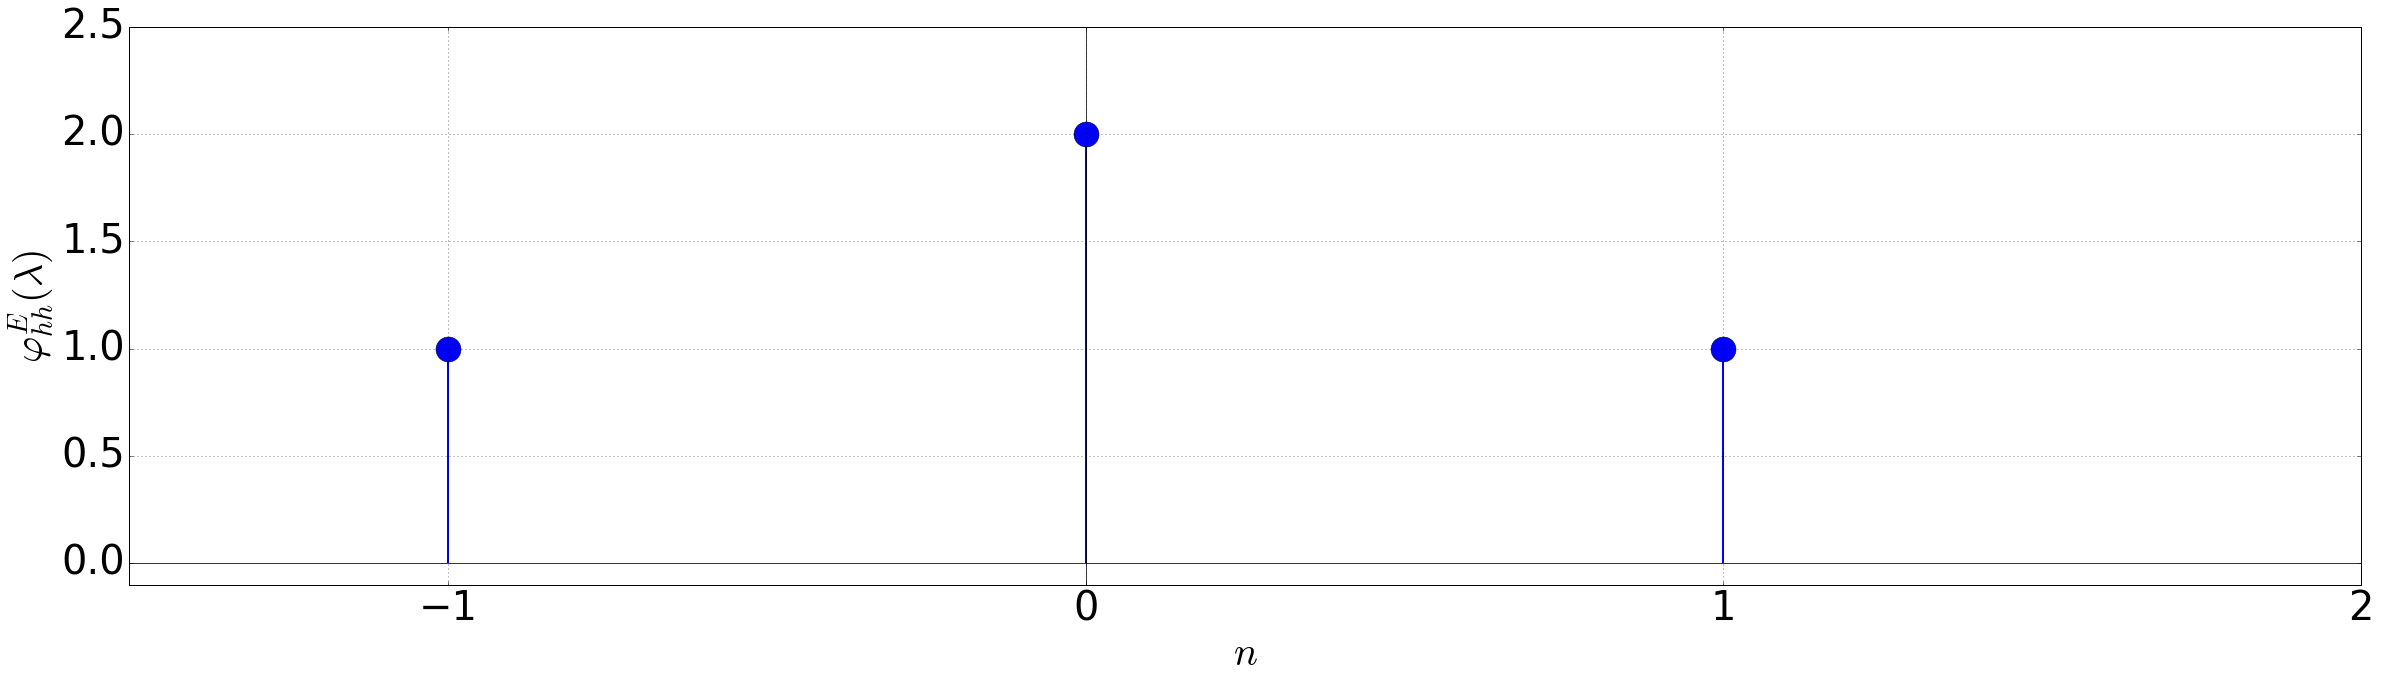

In [6]:
plt.grid()
plt.xlim((-1.5, 1.5))
plt.ylim((-0.1, 2.5))
plt.axvline(linewidth=0.75, color='k')
plt.plot([-1, 0, 1], [1, 2, 1], 'bo', markersize=25)
plt.xticks(np.arange(-1, 3))
plt.vlines([-1, 0, 1], 0, [1, 2, 1], 'b')
plt.axhline(linewidth=0.75, color='k')
setLabels(r'$n$', r'$\varphi^E_{hh}(\lambda)$')

## 7.5
Bestimmen sie das Energiedichtespektrum der Impulsantwort $h(n)$.

Auch im diskreten gilt das Wiener-Khinchine-Theorem:  

\begin{align}
    \Phi^E_{hh}\left(\mathrm{e}^{j\omega T}\right) &= \mathcal{F}_\text{d}\left\{ \varphi^E_{hh}(\lambda) \right\} \\
    &= \mathcal{F}_\text{d}\left\{ \gamma(\lambda+1) + 2\gamma(\lambda) + \gamma(\lambda-1)  \right\} \\
    &= \mathrm{e}^{j\omega T} + 2 + \mathrm{e}^{-j\omega T} \\
    &= 2\left( 1 + \cos\left(\omega T\right)\right)
\end{align}

Das Energiedichtespektrum ist also die Fouriertransformierte der AKF. Weil die AKF eines reellen Zeitsignals immer eine **immer

Alternativ kann mit dem Paar $\mathcal{F}_\text{d}\left\{ h^{\ast}(-n) \right\} = H^{\ast} \left(\mathrm{e}^{j\omega T}\right)$ der Faltungssatz angewendet werden:  

\begin{align}
    \Phi^E_{hh}\left(\mathrm{e}^{j\omega T}\right) &= \mathcal{F}_\text{d}\left\{ h^{\ast}(-\lambda)\ast h(\lambda) \right\} = \mathcal{F}_\text{d}\left\{ h^{\ast}(-\lambda) \right\} \cdot \mathcal{F}_\text{d}\left\{ h(\lambda) \right\} \\
    &= H^{\ast} \left(\mathrm{e}^{j\omega T}\right) H \left(\mathrm{e}^{j\omega T}\right) \\
    &= \left| H \left(\mathrm{e}^{j\omega T}\right)\right|^2 \qquad \qquad  \Bigg| \text{ Teilaufgabe 7.1}\\
    &= 2\left( 1 + \cos\left(\omega T\right)\right)
\end{align}

Das **Energiedichte**spektrum ist also äquivalent das Betragsquadrat der Übertragungsfunktion.  
(**Achtung**! Für das Leistungsdichtespektrum gilt **diese** Aussage nicht!).  
Wegen der hermiteschen Symmetrie der AKF gilt, dass das Energiedichtespektrum **immer** eine rein reelle Funktion in $\omega$ ist. Dies wird auch durch die Formulierung über das **Betrags**quadrat der Übertragungsfunktion deutlich.

#### Graph des Energiedichtespektrums $\Phi^E_{hh}\left(\mathrm{e}^{j\omega T}\right)$:

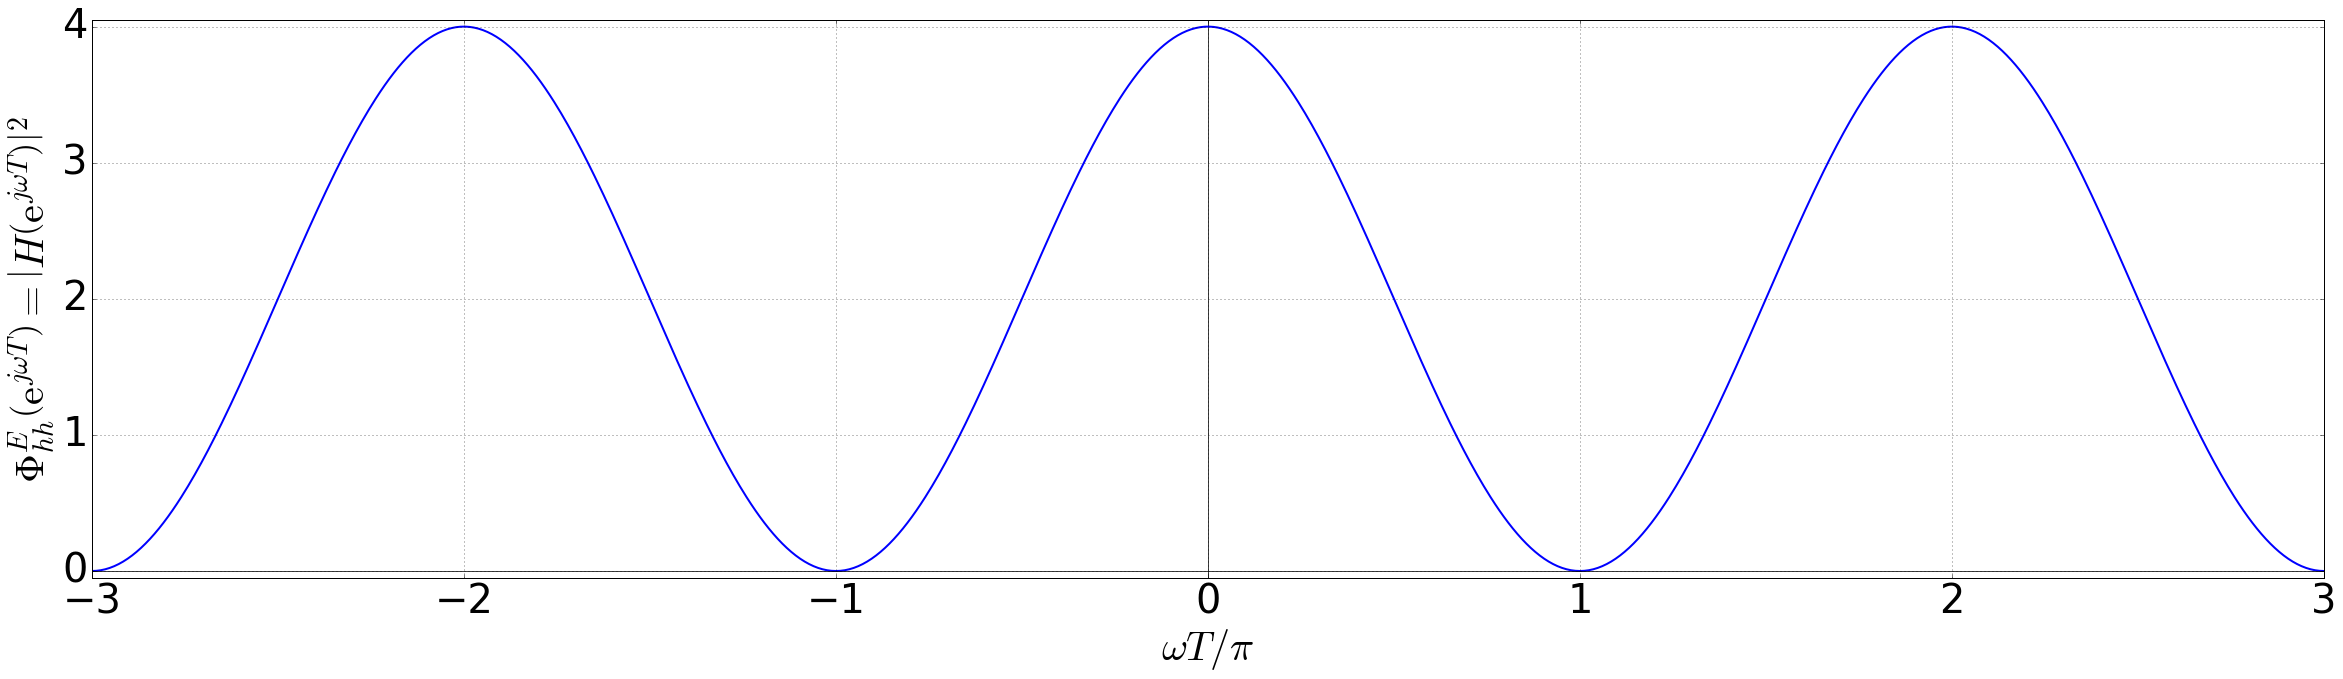

In [7]:
plt.axvline(linewidth=0.75, color='k')
plt.plot(wT/pi, np.abs(H)**2)
plt.axhline(linewidth=0.75, color='k')
plt.ylim((-0.05, 4.05))
plt.grid()
setLabels(r'$\omega T/\pi$', r'$\Phi^E_{hh}\left(\mathrm{e}^{j\omega T}\right)' +
          r'= \left|H \left(\mathrm{e}^{j\omega T}\right)\right|^2$')

## Zusatz: Hintergründe
Das System verhält sich (bis auf den fehlenden Faktor $1/2$ vor jedem Impuls) sehr ähnlich zum System aus Aufgabe 3. Dies lässt sich ausnutzen, indem **das kontinuierliche System** aus Aufgabe 3 **durch Abtastung, diskrete Filterung und Rekonstruktion realisiert** werden kann, sofern das **Abtasttheorem** eingehalten wird. Die Verzögerungsterme müssen dann der Abtastperiodendauer entsprechen.  

Systeme, die eine Summation aus skalierten und verzögerten Versionen des Eingangssignals bilden, sind im Zeitdiskreten sehr wichtig. Das System in dieser Übung stellt ein sogenanntes **FIR-Filter** dar (Finite Impulse Response). Der Name kommt daher, dass die Impulsantwort eine endliche Länge besitzt. **FIR-Filter** bestehen nur aus Verzögerungen, Multiplikationen mit Faktoren und Summieren, **haben aber keine Rückkopplungen**.  

Zu erkennen ist insbesondere, dass wie im Kontinuierlichen gilt: Der Betrag der Übertragungsfunktion liefert einen Frequenzabhängigen Verstärkungsfator, während der Phasenverlauf eine frequenzabhängige Phasenverschiebung darstellt. Wegen

\begin{align}
    \cos\bigg(\omega_0 n T \underbrace{- \frac{\omega_0 T}{2}}_{\varphi(\omega_0)} \bigg) = \cos\bigg(\omega_0 \left(n T - \frac{T}{2}\right) \bigg)
\end{align}

kann die Phasenverschiebung auch als Verzögerung interpretiert werden.
Diese Verzögerung ist die Ableitung $\frac{\mathrm{d}}{\mathrm{d}\omega_0} \varphi(\omega_0) = - \frac{T}{2}$. Sie 
wird Gruppenlaufzeit des Filters genannt und ist bei linearphasigen Systemen konstant.